In [13]:
# importing all necessary libs

import pandas as pd
import numpy as np
from plotly.express import pie
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
# loading our dataset
df = pd.read_csv('data.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# checking for missing values

missing_values = df.isnull().sum()
missing_values

# initializing LabelEncoder
label_encoder = LabelEncoder()

# fit-transforming the data
df['type'] = label_encoder.fit_transform(df['type'])

# Droping irrelevant features
df.drop(['nameDest', 'nameOrig', 'isFlaggedFraud'], axis=1, inplace=True)
df.head(15)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.00,160296.36,0.0,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.0,0.00,0
2,1,4,181.00,181.00,0.00,0.0,0.00,1
3,1,1,181.00,181.00,0.00,21182.0,0.00,1
4,1,3,11668.14,41554.00,29885.86,0.0,0.00,0
5,1,3,7817.71,53860.00,46042.29,0.0,0.00,0
6,1,3,7107.77,183195.00,176087.23,0.0,0.00,0
7,1,3,7861.64,176087.23,168225.59,0.0,0.00,0
8,1,3,4024.36,2671.00,0.00,0.0,0.00,0
9,1,2,5337.77,41720.00,36382.23,41898.0,40348.79,0


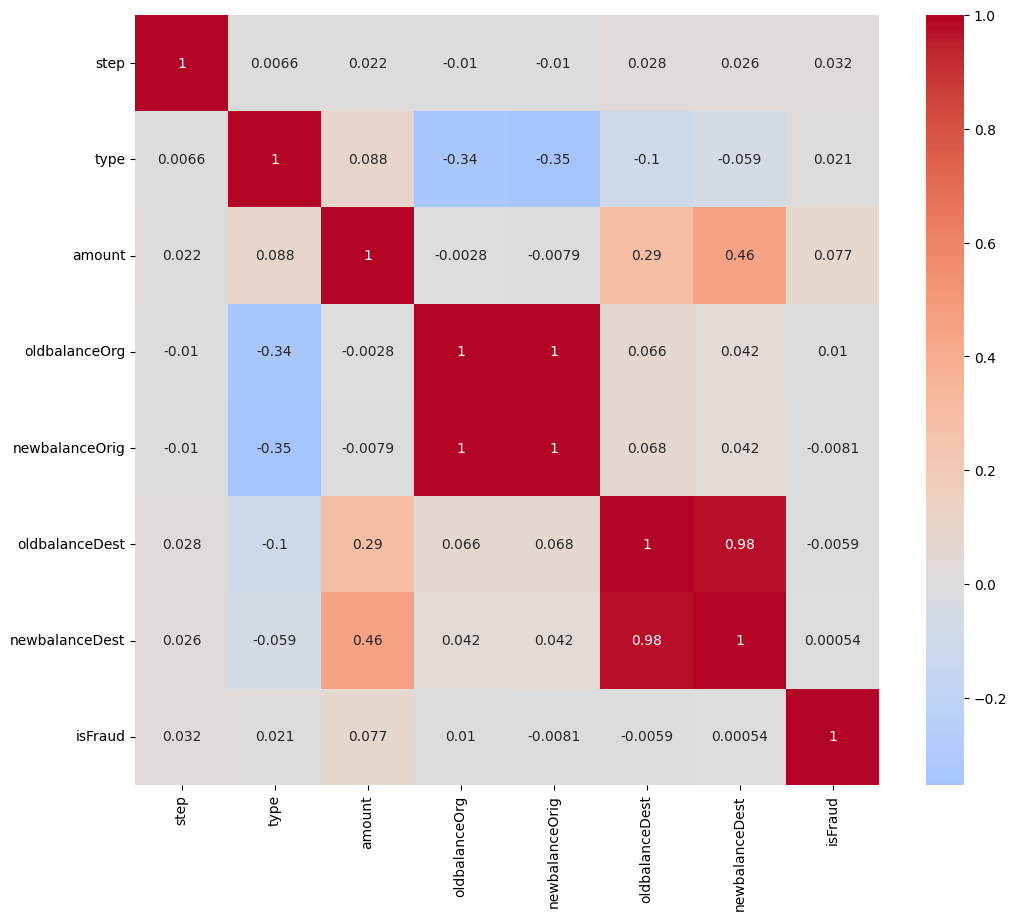

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculating the correlation matrix
corr_matrix = df.corr()

# ploting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

In [5]:
dfs = df[:500]
dfs

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1
3,1,1,181.00,181.00,0.00,21182.00,0.00,1
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
495,1,0,160347.32,7965270.68,8125617.99,724867.22,1517262.16,0
496,1,0,289272.75,8125617.99,8414890.75,413976.60,31469.78,0
497,1,0,63189.26,8414890.75,8478080.00,101925.00,0.00,0
498,1,0,196725.32,8478080.00,8674805.32,2248012.90,3940085.21,0


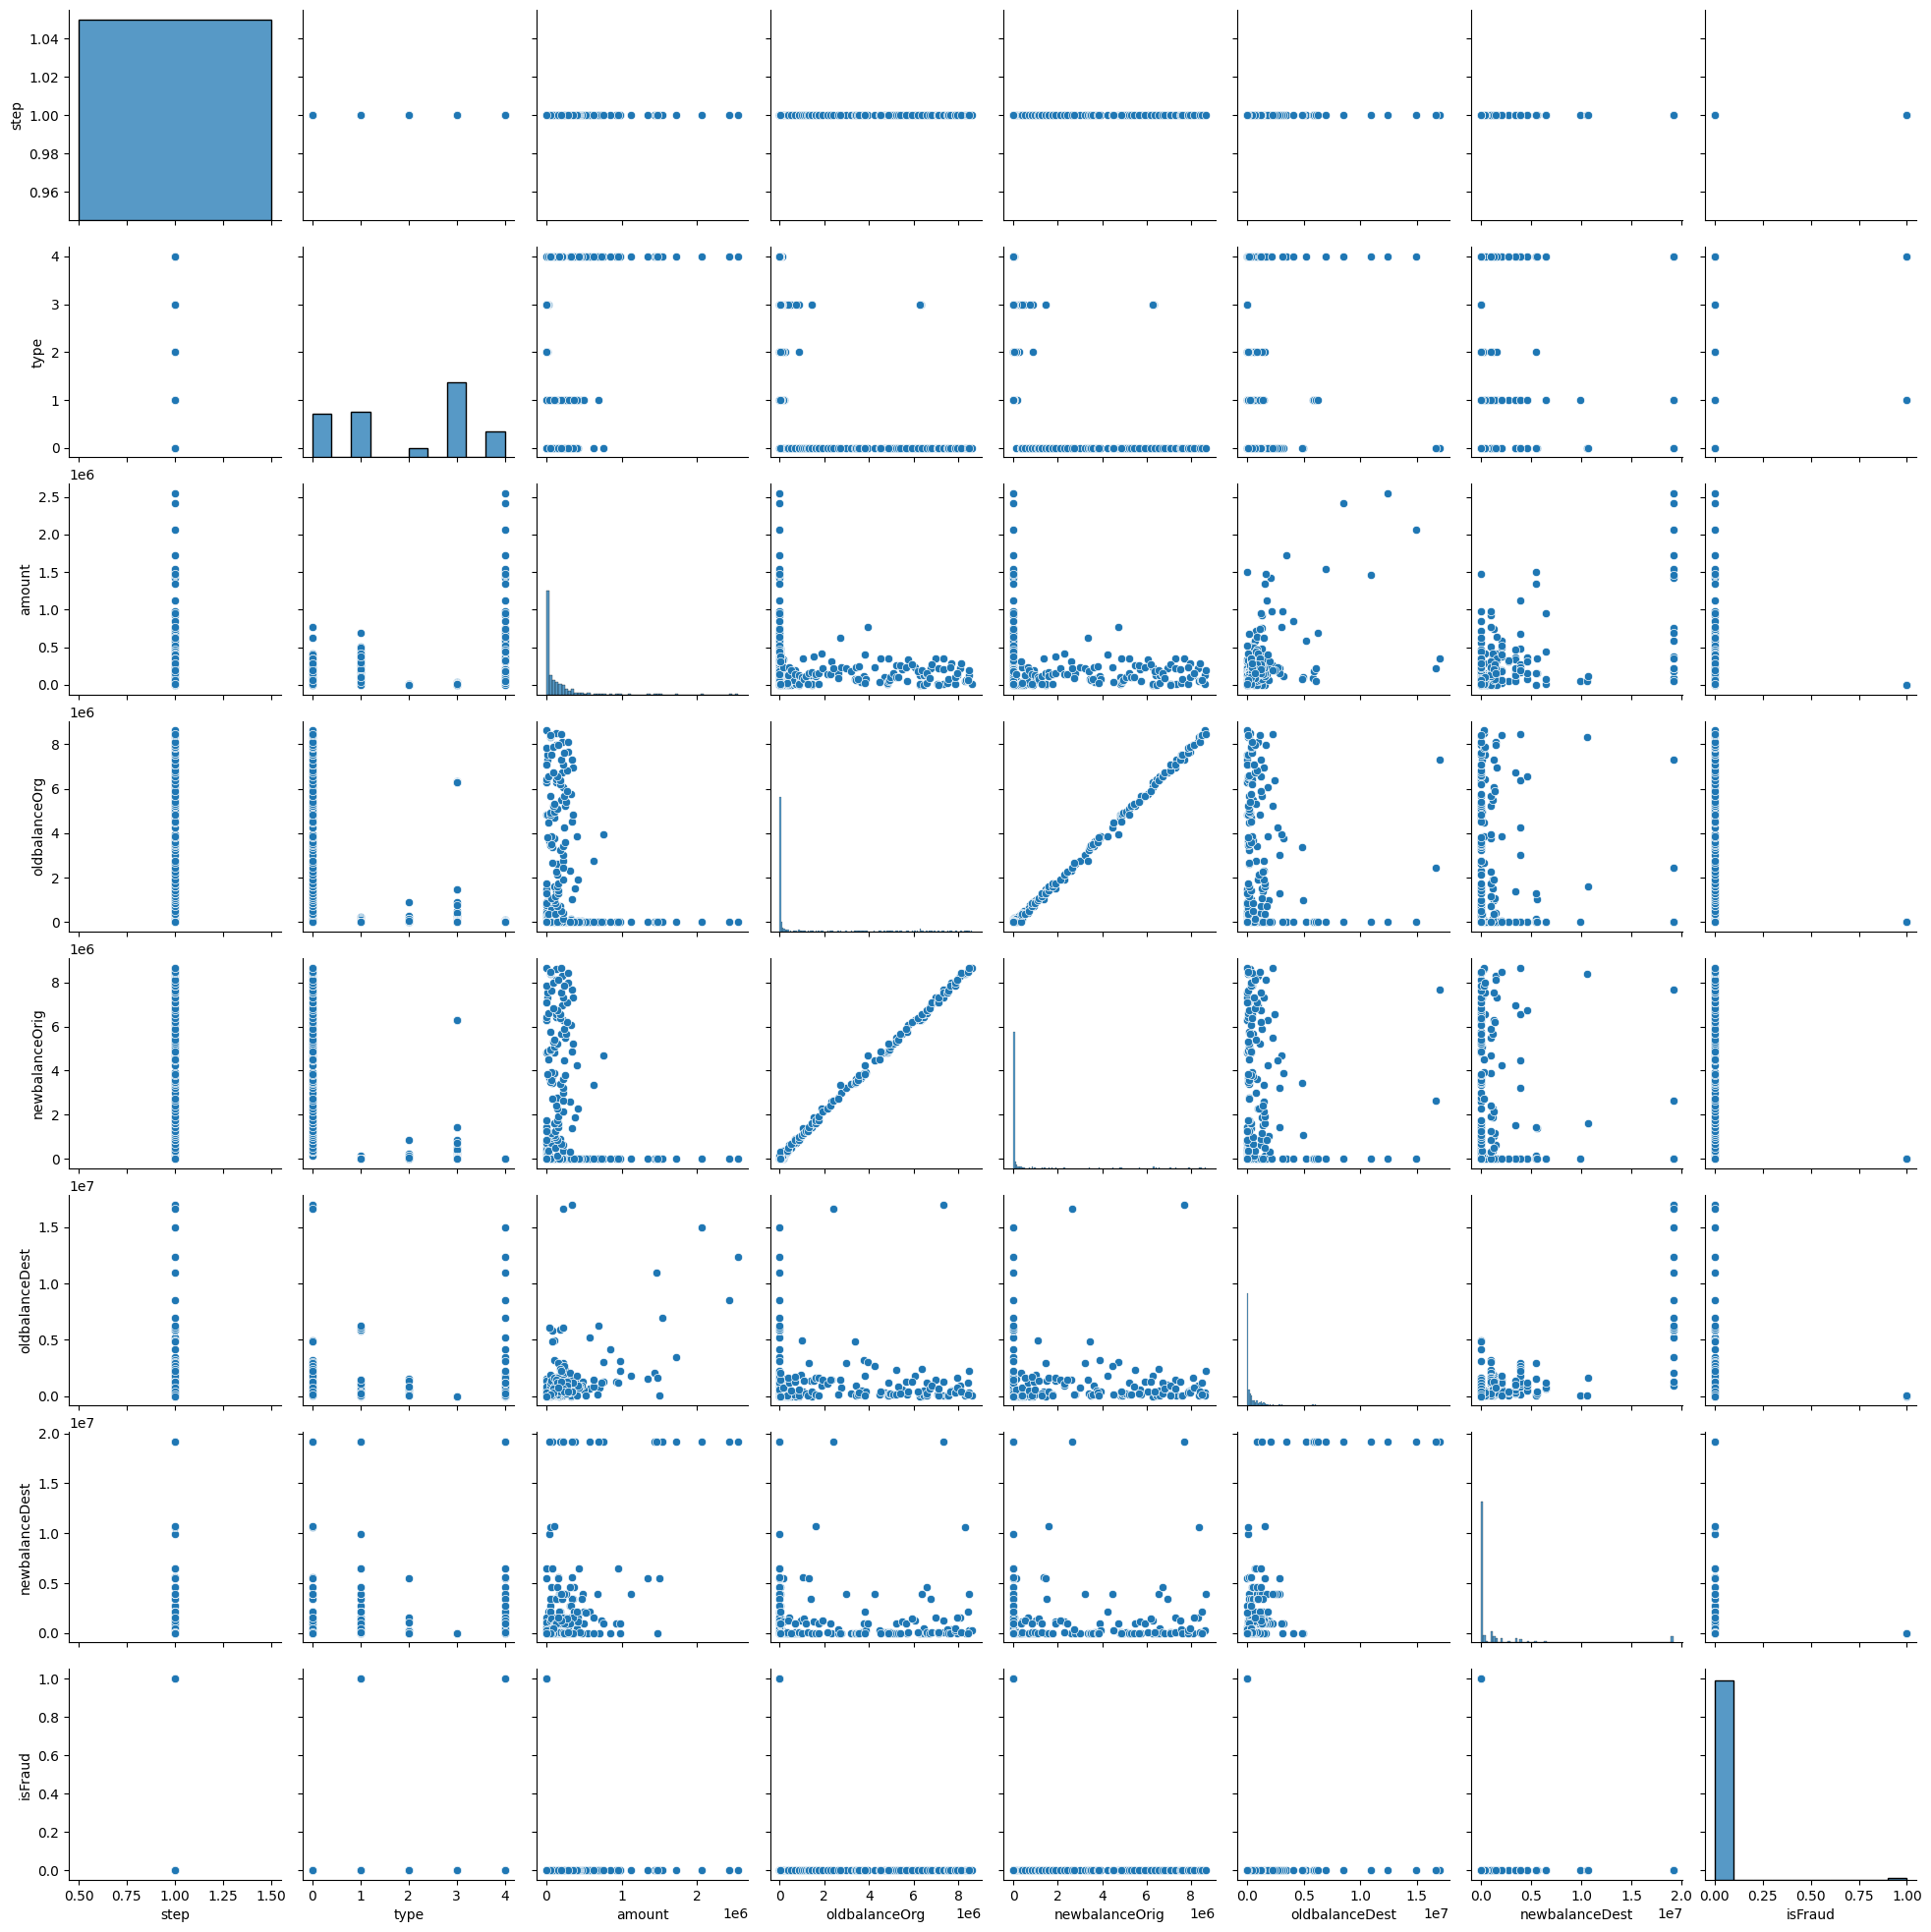

In [6]:
# checking linear relationships

sns.pairplot(df[:500])
plt.show()

In [7]:
# separating target column
X = df.drop(columns=["isFraud"])
y = df["isFraud"]

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=7)

In [10]:
# training the model

model = DecisionTreeClassifier(random_state=7)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

Accuracy: 0.9997013808776888
Confusion Matrix:
[[953039    146]
 [   139   1069]]


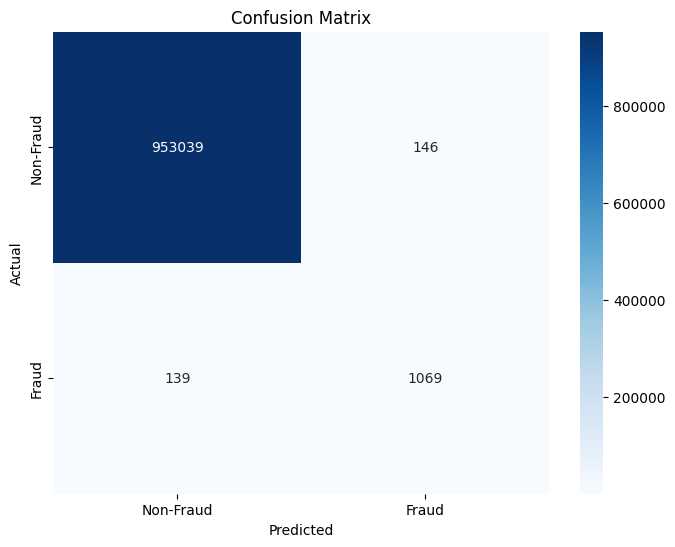

In [15]:
# predicting
y_pred = model.predict(X_test)

# calculating the accuracy and plotting confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

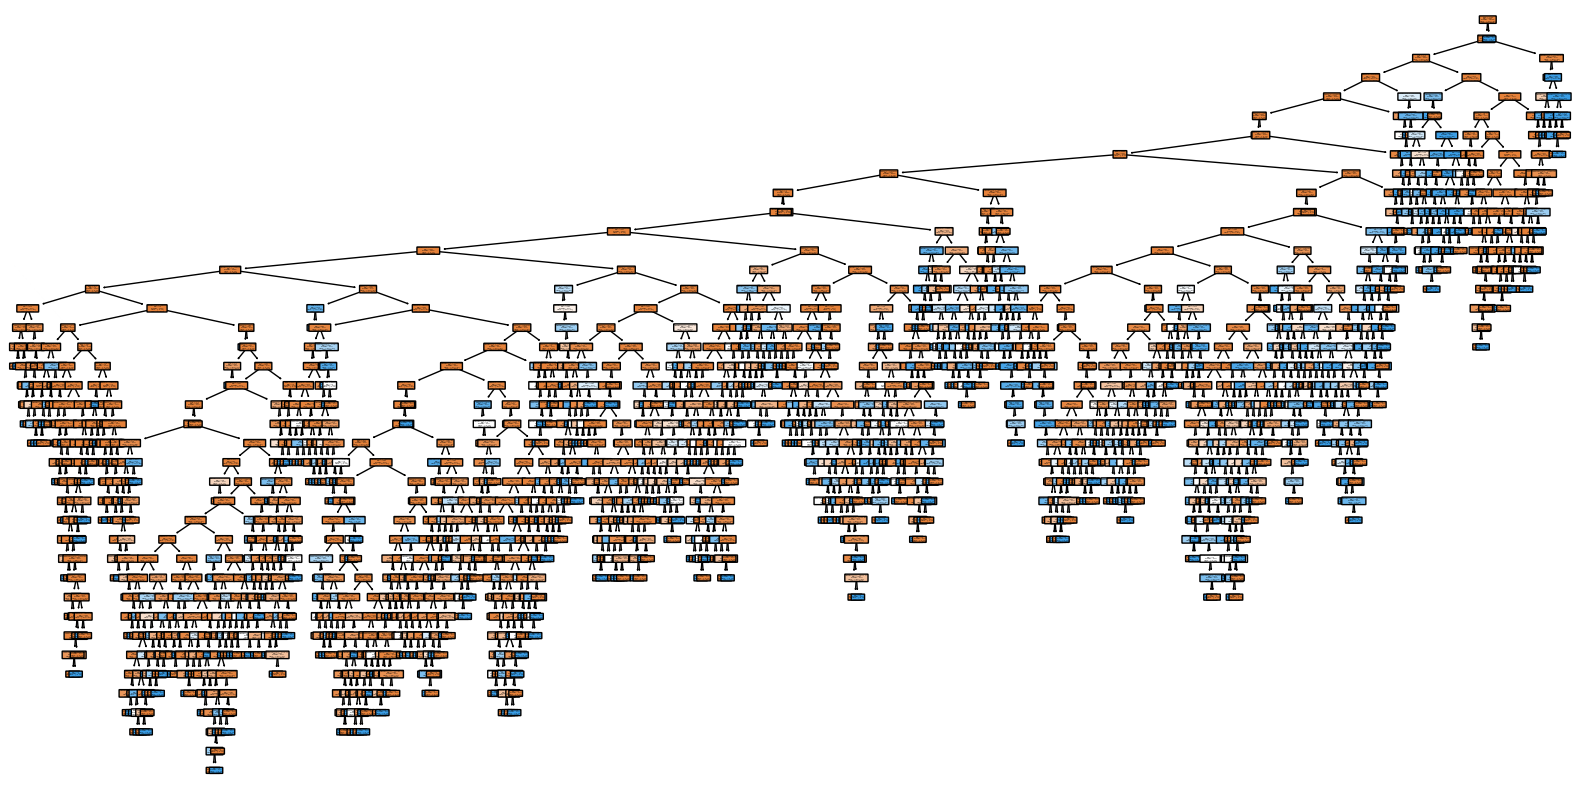

In [18]:
# plotting the tree

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Non-Fraud', 'Fraud'], rounded=True, proportion=True)
plt.show()

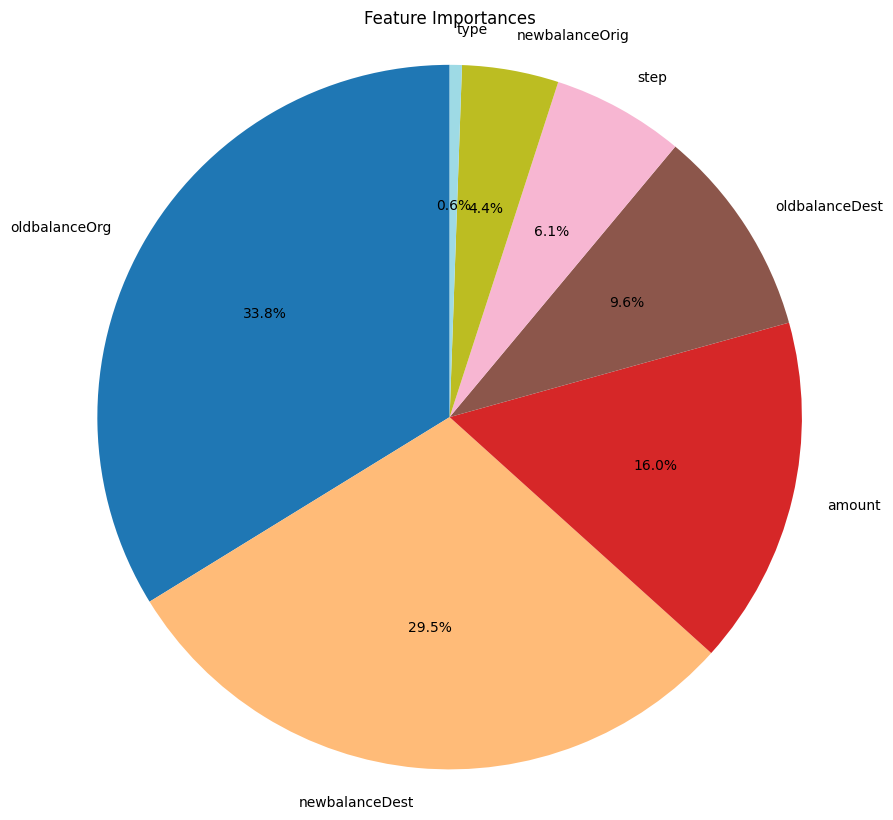

In [23]:
# plotting feature importance as a pie chart

feature_importances = model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Prepare data for the pie chart
labels = feature_importances_df['Feature']
sizes = feature_importances_df['Importance']
colors = plt.cm.tab20(np.linspace(0, 1, len(labels)))

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Feature Importances')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()